In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import keras.utils as image

path = "/content/drive/MyDrive/3D Conformer/Multi-Label Representation of Adverse Covid Drug Reactions.csv"
import csv
import pandas as pd
df = pd.read_csv(path)
df

,PubChem_ID,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,121304016,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
1,5743,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,0
2,3652,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,131411,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,6167,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,64927,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,44205240,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
7,132274054,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,1,0,0,1,0
8,134223875,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
9,135626798,0,0,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,1,1,0


In [ ]:
from tensorflow.keras.preprocessing import image
df['PubChem_ID'] = df['PubChem_ID'].apply(str)
df_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/drive/MyDrive/Conformer/'+df['PubChem_ID'][i]+'.png',target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    df_image.append(img)
X = np.array(df_image)

100%|██████████| 17/17 [00:10<00:00,  1.67it/s]


In [ ]:
y = np.array(df.drop(['PubChem_ID'],axis=1))
y.shape

(17, 29)

In [ ]:
X.shape

(17, 128, 128, 3)

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,MobileNet
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.Xception(input_shape = (128, 128, 3), include_top = False, weights = "imagenet")

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.backend import sigmoid

#def swish(x, beta = 1):
#    return (x * sigmoid(beta * x))
# Getting the Custom object and updating them
#from keras.utils.generic_utils import get_custom_objects
#from keras.layers import Activation

# Below in place of swish you can take any custom key for the name
#get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
import tensorflow as tf

# Define input shape explicitly
input_shape = (128, 128, 3)

base_model = tf.keras.applications.Xception(
    input_shape=input_shape,
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape), # Add Input layer with shape
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(29, activation="sigmoid")
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 4, 4, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 29)                  │          59,421 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,920,901 (79.81 MB)

 Trainable params: 59,421 (232.11 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Training on Fold:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Accuracy: 0.55172
[0.55172]
hamming loss 0.4482758620689655
[0.4482758620689655]
Precision: 0.500000
[0.5]
Recall: 0.154000
[0.154]
F1 score: 0.235000
[0.235]
Training on Fold:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Accuracy: 0.65517
[0.55172, 0.65517]
hamming loss 0.3448275862068966
[0.4482758620689655, 0.3448275862068966]
Precision: 0.750000
[0.5, 0.75]
Recall: 0.250000
[0.154, 0.25]
F1 score: 0.375000
[0.235, 0.375]
Training on Fold:  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Accuracy: 0.96552
[0.55172, 0.65517, 0.96552]
hamming loss 0.034482758620689655
[0.4482758620689655, 0.3448275862068966, 0.034482758620689655]
Precision: 1.000000
[0.5, 0.75, 1.0]
Recall: 0.875000
[0.154, 0.25, 0.875]
F1 score: 0.933000
[0.235, 0.375, 0.933]
Training on Fold:  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Accuracy: 0.86207
[0.55172, 0.65517, 0.96552, 0.86207]
hamming loss 0.13793103448275862
[0.4482758620689655, 0.3448275862068966, 0.0344827

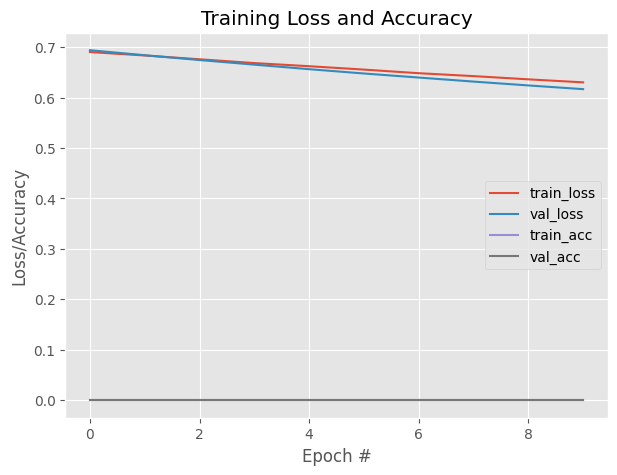

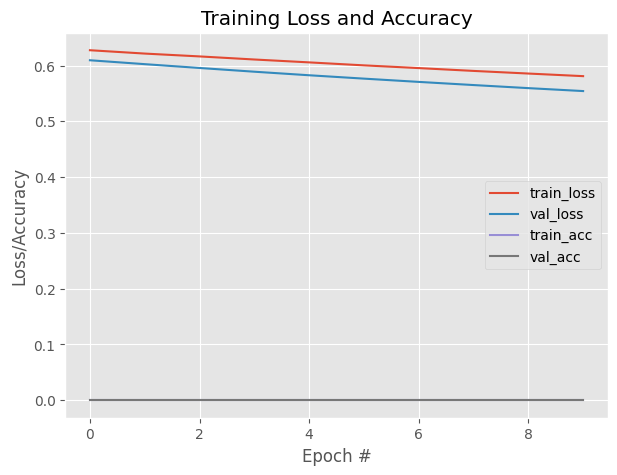

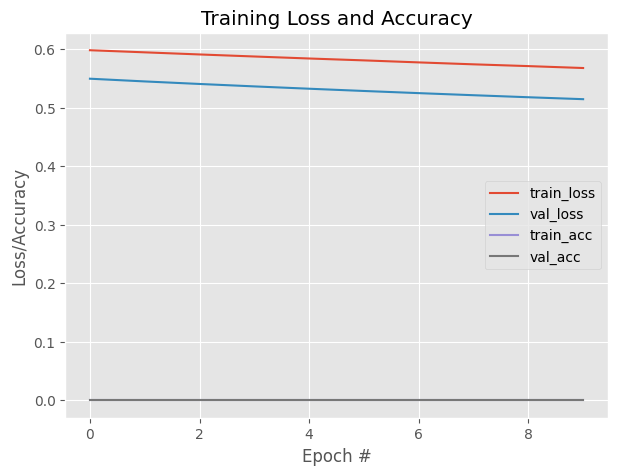

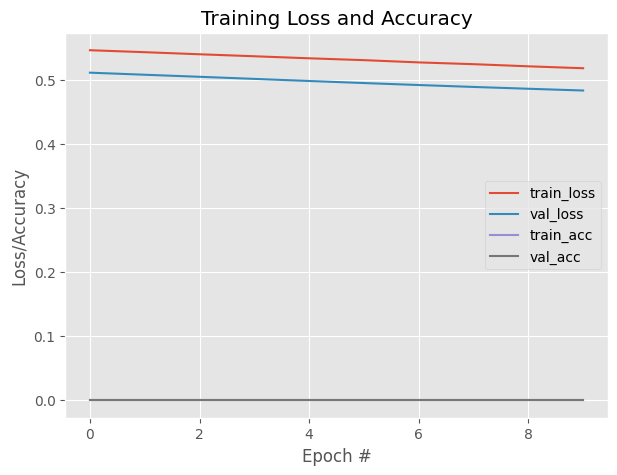

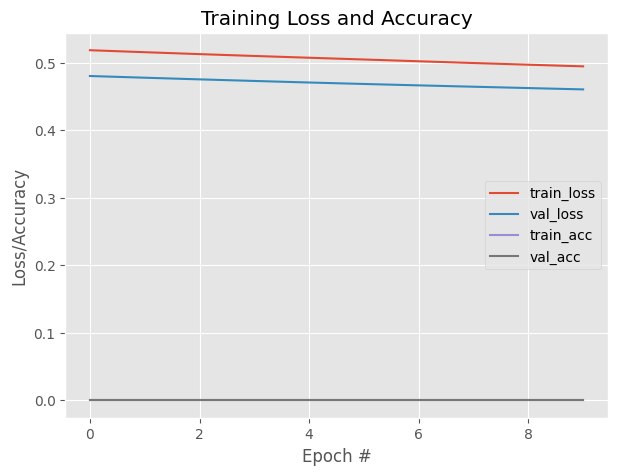

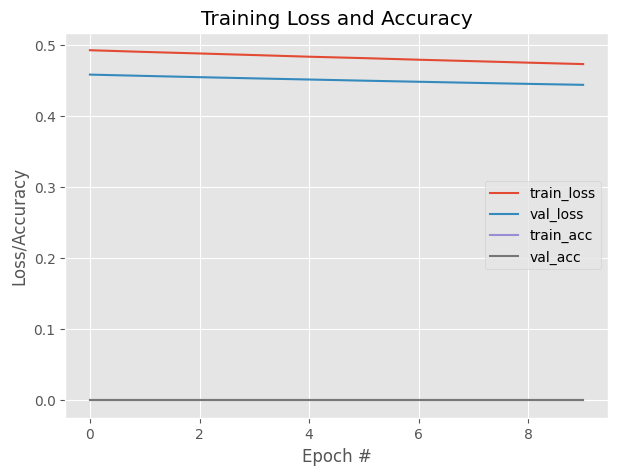

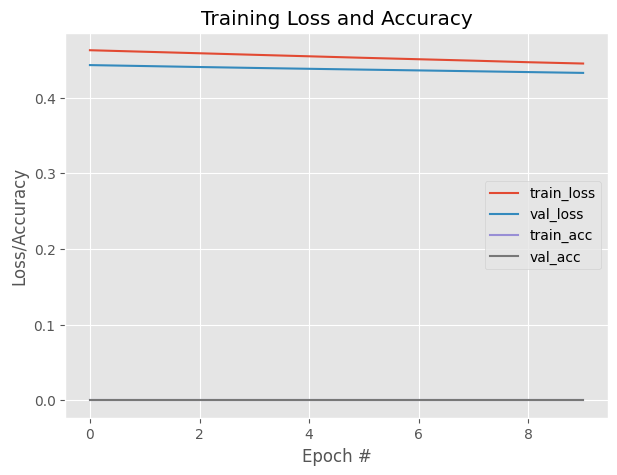

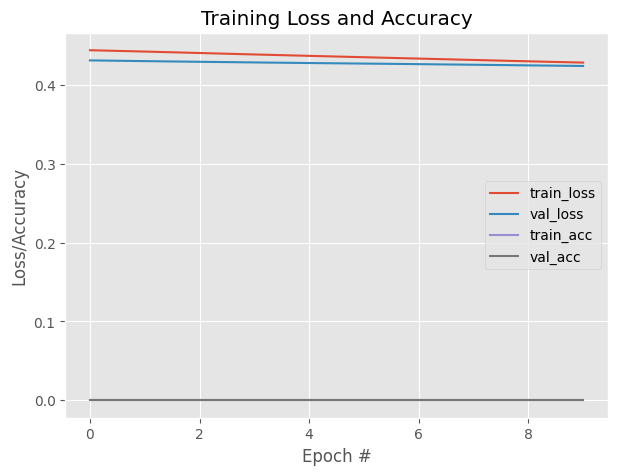

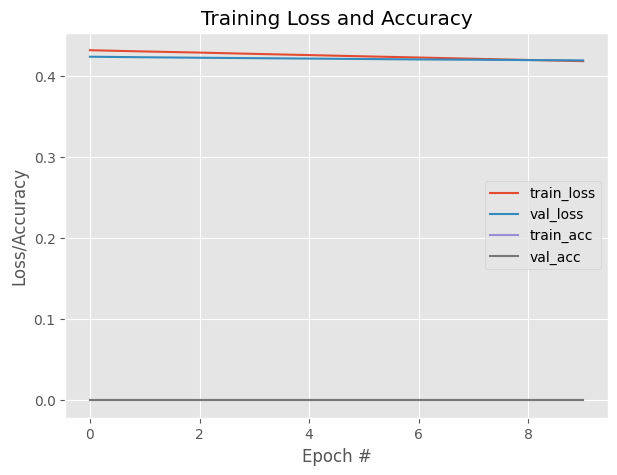

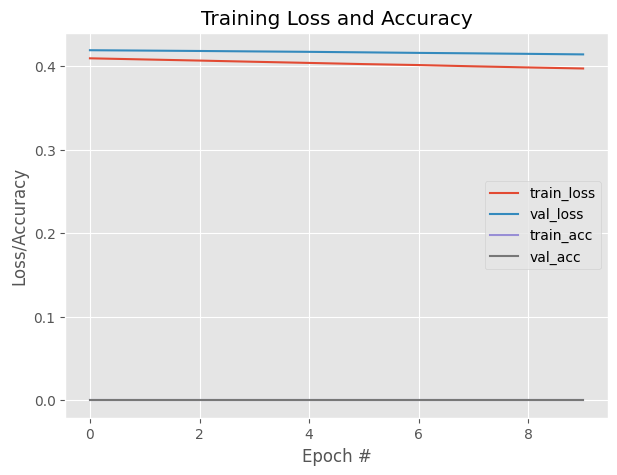

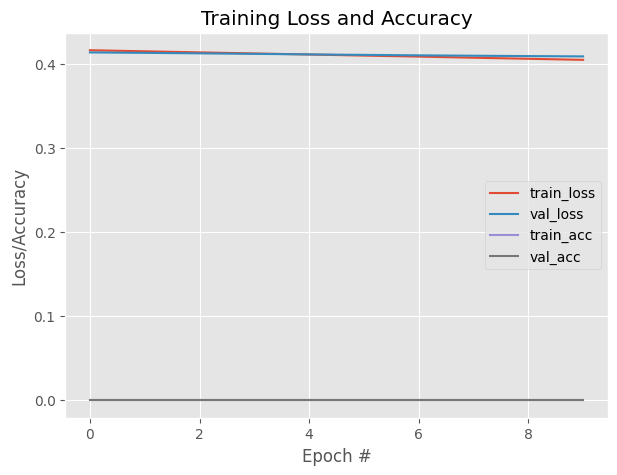

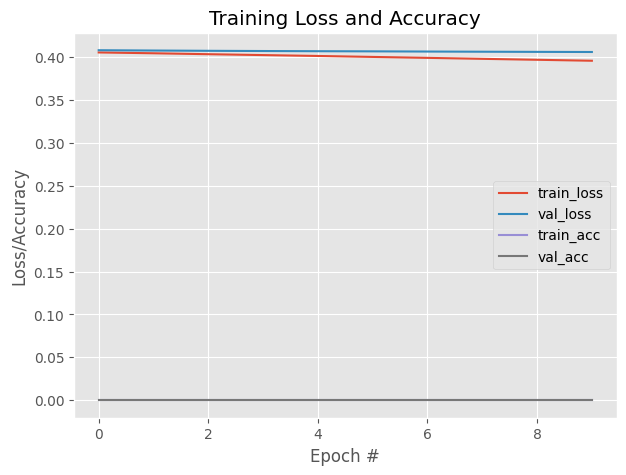

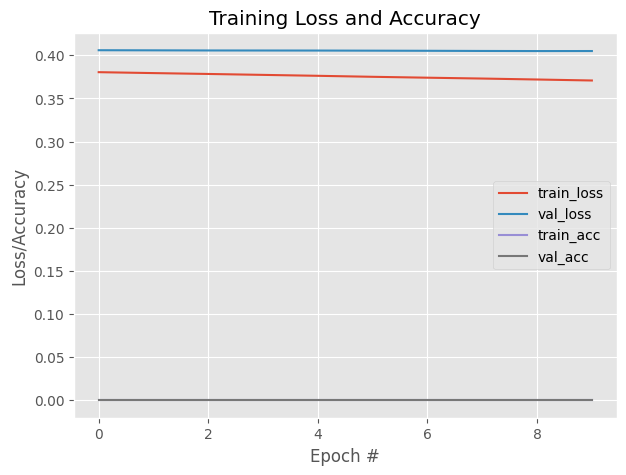

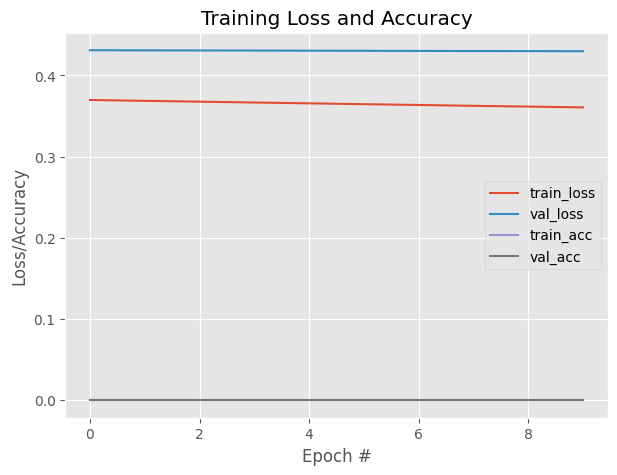

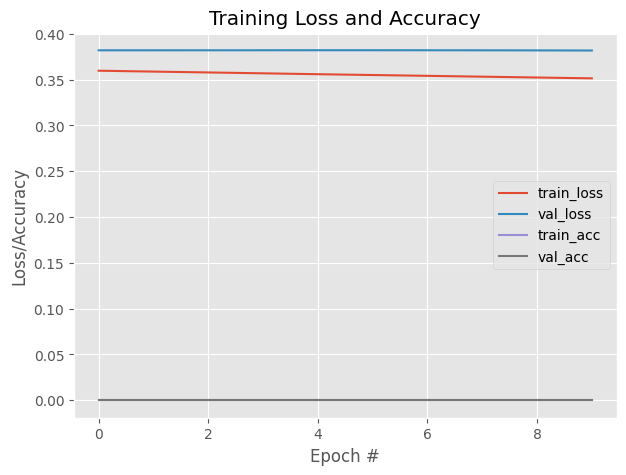

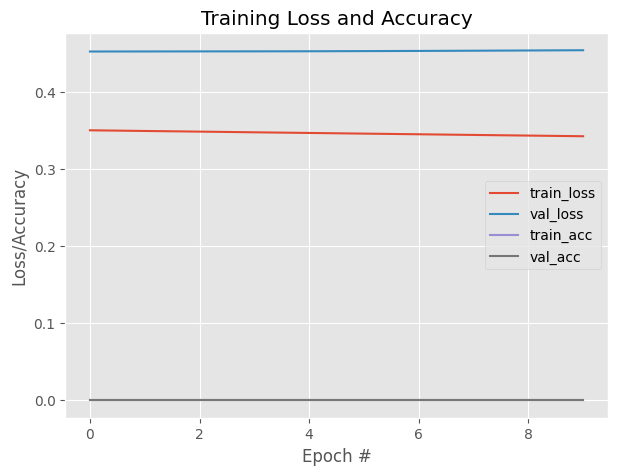

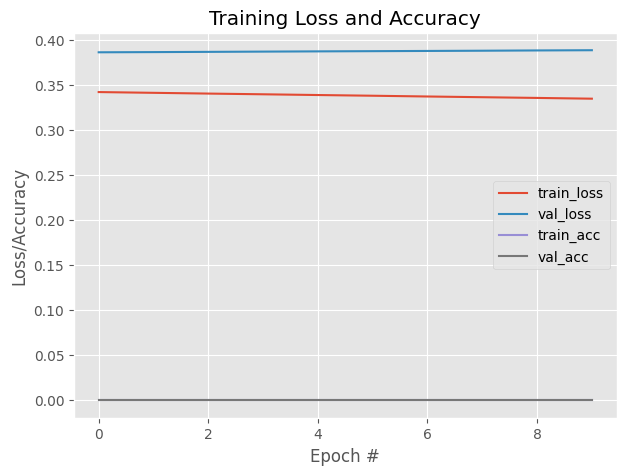

In [ ]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
import tensorflow as tf
opt = tf.keras.optimizers.Adam(
     learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
     name='Adam')
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)

from sklearn.datasets import make_circles
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
import numpy as np

def main_accuracy_score(y_test, y_pred):
    # y_pred is a numpy array, y_test is a dataframe
    # to compare the two, convert to a single type
    y_test = y_test#.to_numpy()

    # shape of test and preds must be equal
    assert y_test.shape == y_pred.shape
    i=0
    # list of scores for each training sample
    scores = []

    # for each test sample
    while i < len(y_test):
        count=0
        # count the number of matches in the sample
        # y_test[i] -> row values in test set (true values)
        # y_pred[i] -> row values in predictions set (predicted values)
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        # accuracy score for the sample = no. of correctly predicted labels/total no. of labels
        scores.append(count / y_pred.shape[1])
        i+=1

    # final accuracy = avg. accuracy over all test samples =
    # sum of the accuracy of all training samples/no. of training samples
    return round((sum(scores)/len(y_test)), 5)

stdma=[]
stdhl=[]
stdsa=[]
stdp=[]
stdr=[]
stdf=[]
stdroc=[]
y_predictedvalues=[]
y_predictedvalues1=[]
y_testedvalues=[]

model_history = []
i=1
for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, X_test, y_train, y_test)

    print("Training on Fold: ",i)
    i=i+1

    history_model = model.fit(X_train , y_train, validation_split=0.2, epochs=10, batch_size = 8, verbose=0)

    # plot the training loss and accuracy
    N = 10
    plt.style.use("ggplot")
    plt.figure(figsize=(7, 5))
    plt.plot(np.arange(0, N), history_model.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history_model.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), history_model.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), history_model.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="center right")
    plt.savefig("plot.png")

    y_pred = model.predict(X_test)
    y_pred1 = np.where(y_pred > 0.5, 1, 0)
    y_predictedvalues.append(y_pred)
    y_predictedvalues1.append(y_pred1)

    y_testedvalues.append(y_test)

    print("Accuracy: " + str(main_accuracy_score(y_test, y_pred1)))
    stdma.append(main_accuracy_score(y_test, y_pred1))
    print(stdma)

    print("hamming loss", hamming_loss(y_test, y_pred1))
    stdhl.append(hamming_loss(y_test, y_pred1))
    print(stdhl)


    precision = precision_score(y_test, y_pred1, average='micro')
    print('Precision: %f' % round((precision),3))
    stdp.append(round((precision),3))
    print(stdp)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred1, average='micro')
    print('Recall: %f' % round((recall),3))
    stdr.append(round((recall),3))
    print(stdr)


    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred1, average='micro')
    print('F1 score: %f' % round((f1),3))
    stdf.append(round((f1),3))
    print(stdf)

In [ ]:
from numpy import std
import statistics
print(stdma)
print("Accuracy  & Standard Deviation is  ", statistics.mean(stdma),(statistics.stdev(stdma)))

print(stdhl)
print("Hamming Loss  & Standard Deviation is  ", statistics.mean(stdhl),(statistics.stdev(stdhl)))

print(stdp)
print("Precision  & Standard Deviation is  ", statistics.mean(stdp),(statistics.stdev(stdp)))

print(stdr)
print("Recall  & Standard Deviation is  ", statistics.mean(stdr),(statistics.stdev(stdr)))

print(stdf)
print("F1 score  & Standard Deviation is  ", statistics.mean(stdf),(statistics.stdev(stdf)))

[0.55172, 0.65517, 0.96552, 0.86207, 0.93103, 0.93103, 0.7931, 0.7931, 0.86207, 0.82759, 0.82759, 0.96552, 0.7931, 0.86207, 0.72414, 0.96552, 0.82759]
Accuracy  & Standard Deviation is   0.8316429411764706 0.11232335619566763
[0.4482758620689655, 0.3448275862068966, 0.034482758620689655, 0.13793103448275862, 0.06896551724137931, 0.06896551724137931, 0.20689655172413793, 0.20689655172413793, 0.13793103448275862, 0.1724137931034483, 0.1724137931034483, 0.034482758620689655, 0.20689655172413793, 0.13793103448275862, 0.27586206896551724, 0.034482758620689655, 0.1724137931034483]
Hamming Loss  & Standard Deviation is   0.16835699797160245 0.11232222903914571
[0.5, 0.75, 1.0, 0.4, 1.0, 0.833, 0.5, 0.75, 0.8, 1.0, 1.0, 1.0, 0.75, 0.625, 0.5, 1.0, 0.286]
Precision  & Standard Deviation is   0.7467058823529412 0.24045861512583677
[0.154, 0.25, 0.875, 0.667, 0.667, 0.833, 0.333, 0.375, 0.571, 0.583, 0.545, 0.75, 0.375, 0.833, 0.25, 0.8, 1.0]
Recall  & Standard Deviation is   0.5800588235294117 0

In [ ]:
# Assuming y_testedvalues_original and y_predictedvalues_original
# hold the original lists before any reshaping

y_testedvalues_flat = np.concatenate(y_testedvalues)
y_predictedvalues_flat = np.concatenate(y_predictedvalues)

# Convert predicted probabilities to binary predictions (0 or 1)
y_predictedvalues_flat_binary = np.where(y_predictedvalues_flat > 0.5, 1, 0)

print(classification_report(y_testedvalues_flat, y_predictedvalues_flat_binary, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.6667    0.5000    0.5714         4
           2     0.0000    0.0000    0.0000         1
           3     0.0000    0.0000    0.0000         1
           4     0.0000    0.0000    0.0000         1
           5     0.0000    0.0000    0.0000         2
           6     0.0000    0.0000    0.0000         1
           7     1.0000    0.2500    0.4000         8
           8     0.7333    1.0000    0.8462        11
           9     0.6250    0.5556    0.5882         9
          10     0.0000    0.0000    0.0000         3
          11     0.0000    0.0000    0.0000         4
          12     0.6250    1.0000    0.7692        10
          13     1.0000    0.3333    0.5000         3
          14     0.0000    0.0000    0.0000         2
          15     1.0000    1.0000    1.0000         1
          16     0.0000    0.0000    0.0000         2
          17     0.8667    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


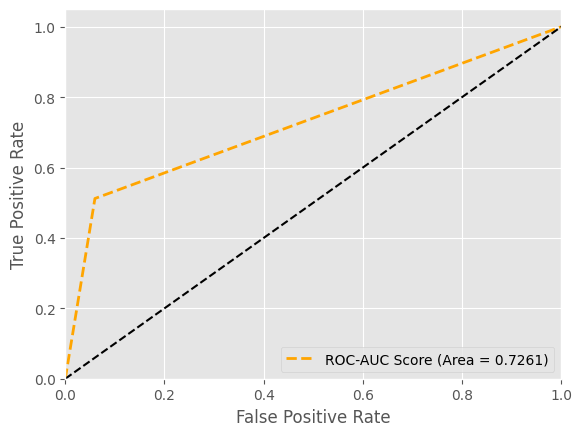

In [ ]:
n_classes = y.shape[1]
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy.interpolate import interp1d

y_testtest=y_testedvalues_flat
yhat=y_predictedvalues_flat_binary

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testtest[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_testtest.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp1d(fpr[i], tpr[i])(all_fpr)

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='ROC-AUC Score (Area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='orange', linestyle='--', linewidth=2)



plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import seaborn as sns
def plot(conf_matrix, labels):
    plot_count = 1
    fig = plt.figure(figsize=(20, 60))
    for _ in range(len(labels)//5):
        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

import numpy as np
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

IndexError: list index out of range

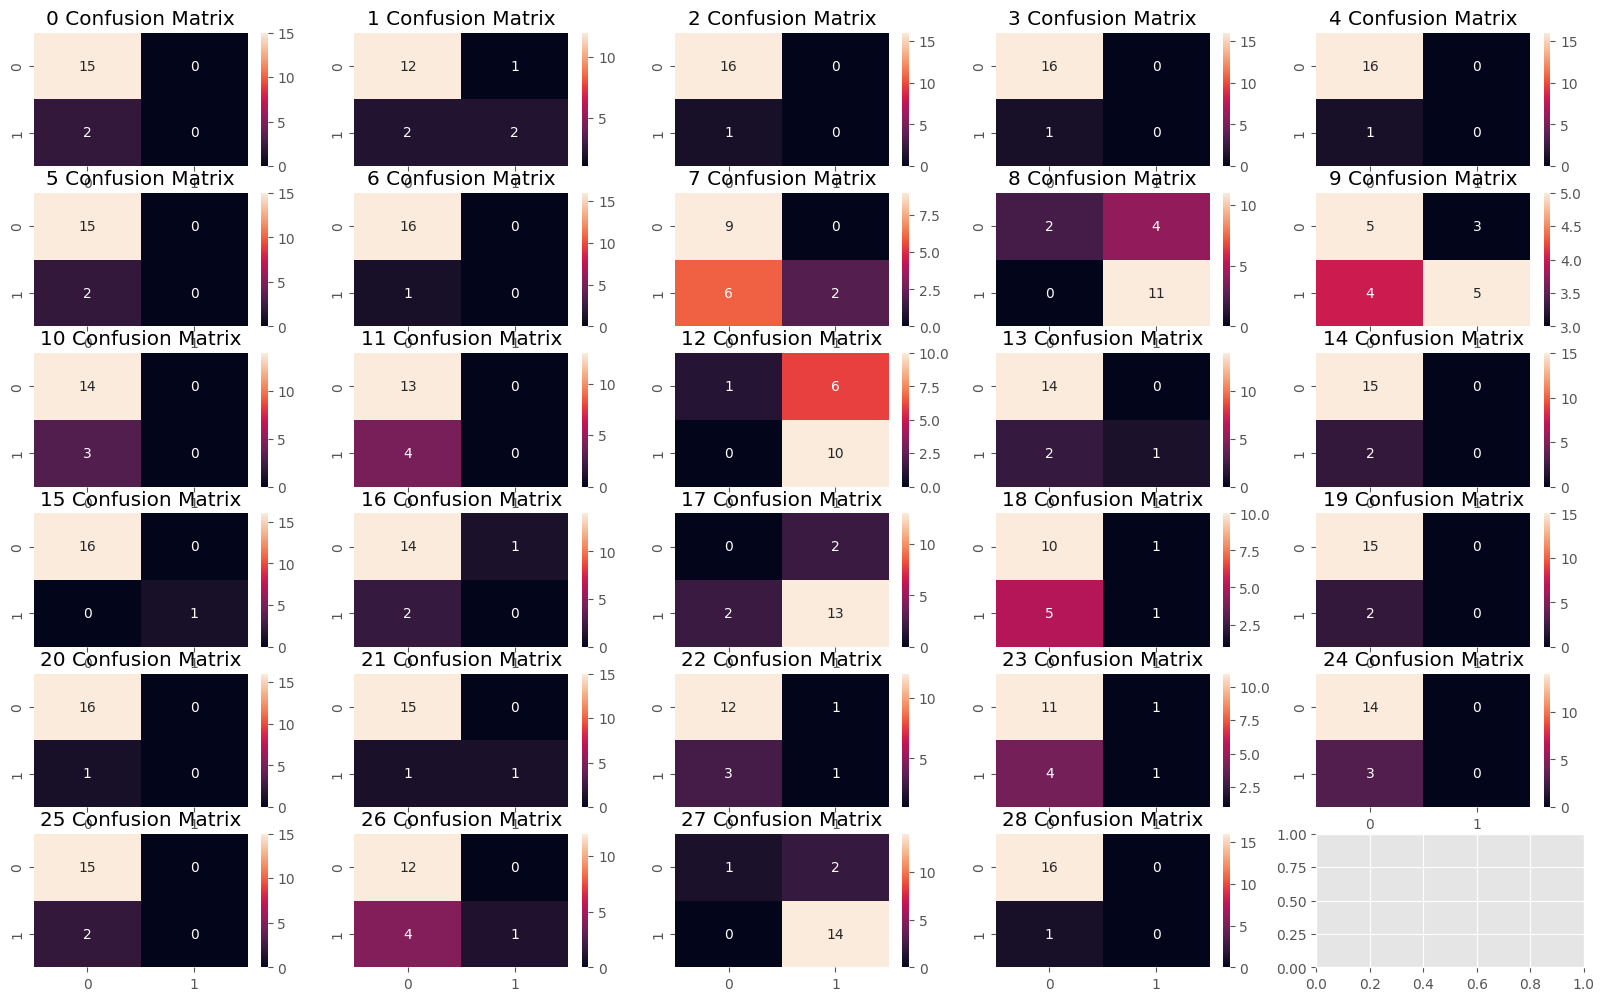

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix



y_true = y_testedvalues_flat
y_pred = yhat

labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

plot(conf_mat_dict, labels)
plt.savefig('DT-CM-without-MLSMOTE.pdf')
#fig1.savefig('RF-cm-without-MLsmote.png', dpi=100)
# for label matrix in conf_mat_dict.items():
#     print("Confusion matrix for label {}:".format(label))
#     print(matrix)